# Molecular network lifetimes with kugupu

This notebook shows how the `kugupu.time` submodule can be used to investigate the time dependence of molecular networks.

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
import kugupu as kgp
import numpy as np

In [27]:
res = kgp.load_results('./dense.hdf5')

In [28]:
res.frames

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

The `kugupu.time.determine_lifetimes` function calculates the duration of each coupling between two fragments.
The function returns a one dimensional array of the measured lifetimes of the coupling,
as well as a boolean array of if the end of the lifetime was observed.
The latter is important in avoiding right censorship when determining the lifetime.

In [30]:
durations, observations = kgp.time.determine_lifetimes(res.H_frag, 0.00001)

We can plot a histogram of the lifetimes to get an idea of how long our molecules are staying coupled.
Here we see that most are only briefly coupled.

<IPython.core.display.Javascript object>


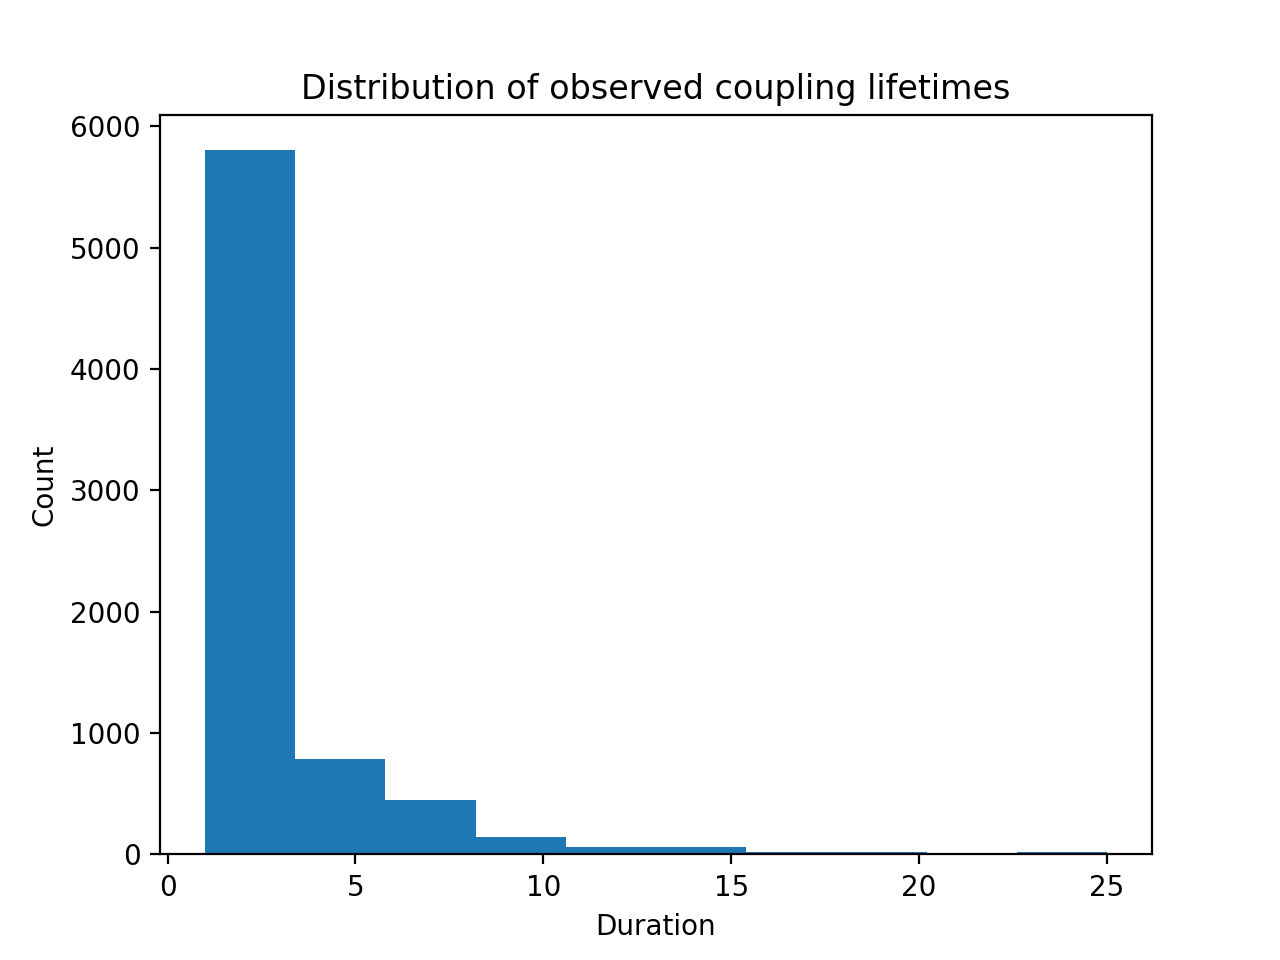

Text(0, 0.5, 'Count')

In [34]:
fig, ax = plt.subplots()

ax.hist(durations)

ax.set_title('Distribution of observed coupling lifetimes')
ax.set_xlabel('Duration')
ax.set_ylabel('Count')

We can do a more detailed analysis by fitting a Kaplan-Meier estimator to the data.
This is done using an implementation from the `lifelines` Python package.

In [35]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=observations)  

<lifelines.KaplanMeierFitter: fitted with 7362 observations, 810 censored>

This can be plotted to show the estimated rate of decay of a given coupling over time.
Here we can see that after 5 frames, only 20% of couplings are expected to still be "alive".

<IPython.core.display.Javascript object>


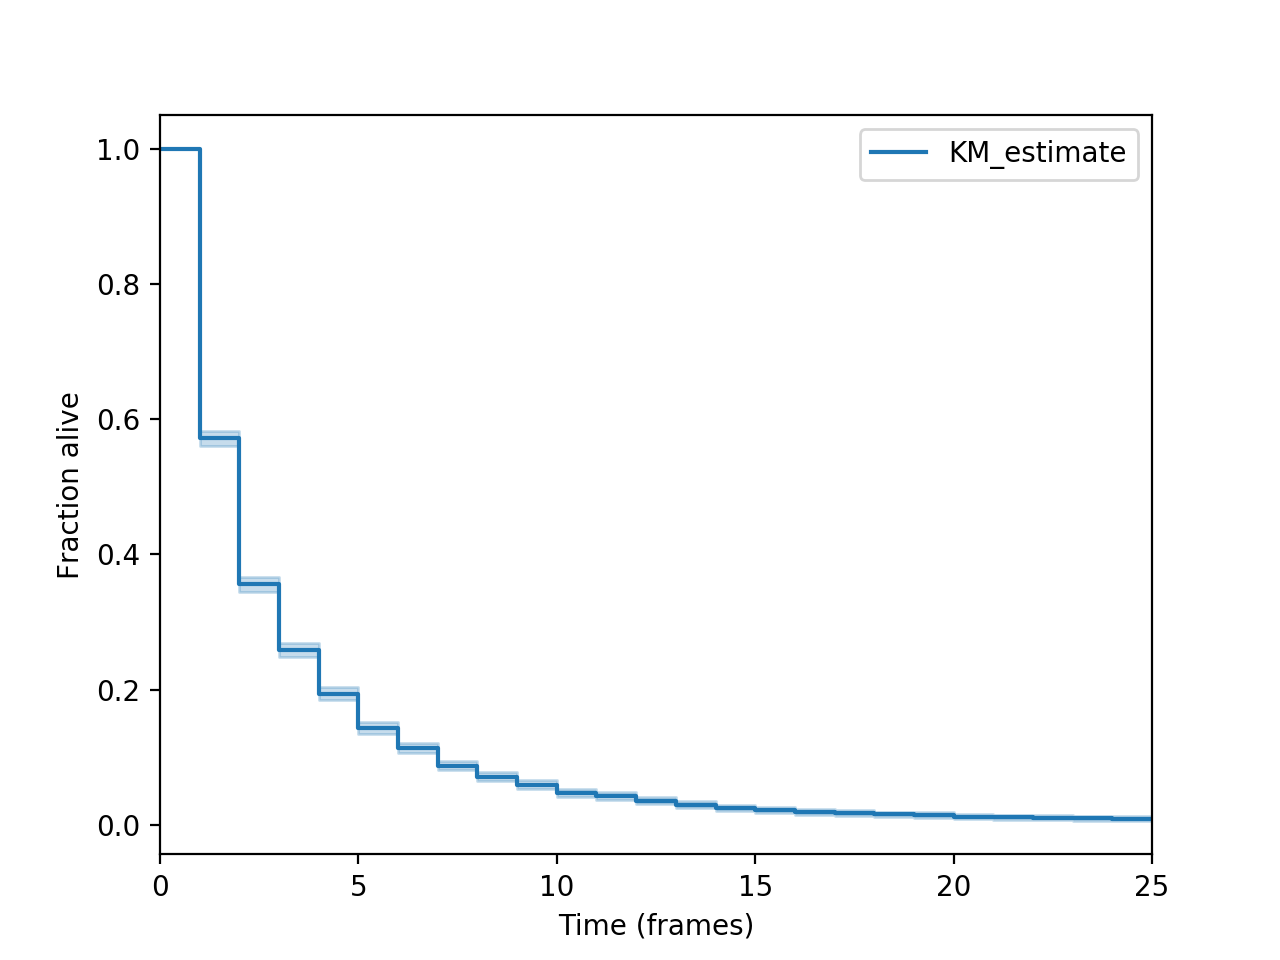

Text(0.5, 0, 'Time (frames)')

In [37]:
fig, ax = plt.subplots()

kmf.plot(ax=ax)

ax.set_ylabel('Fraction alive')
ax.set_xlabel('Time (frames)')